In [1]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils
from pyomo.environ import*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.7 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

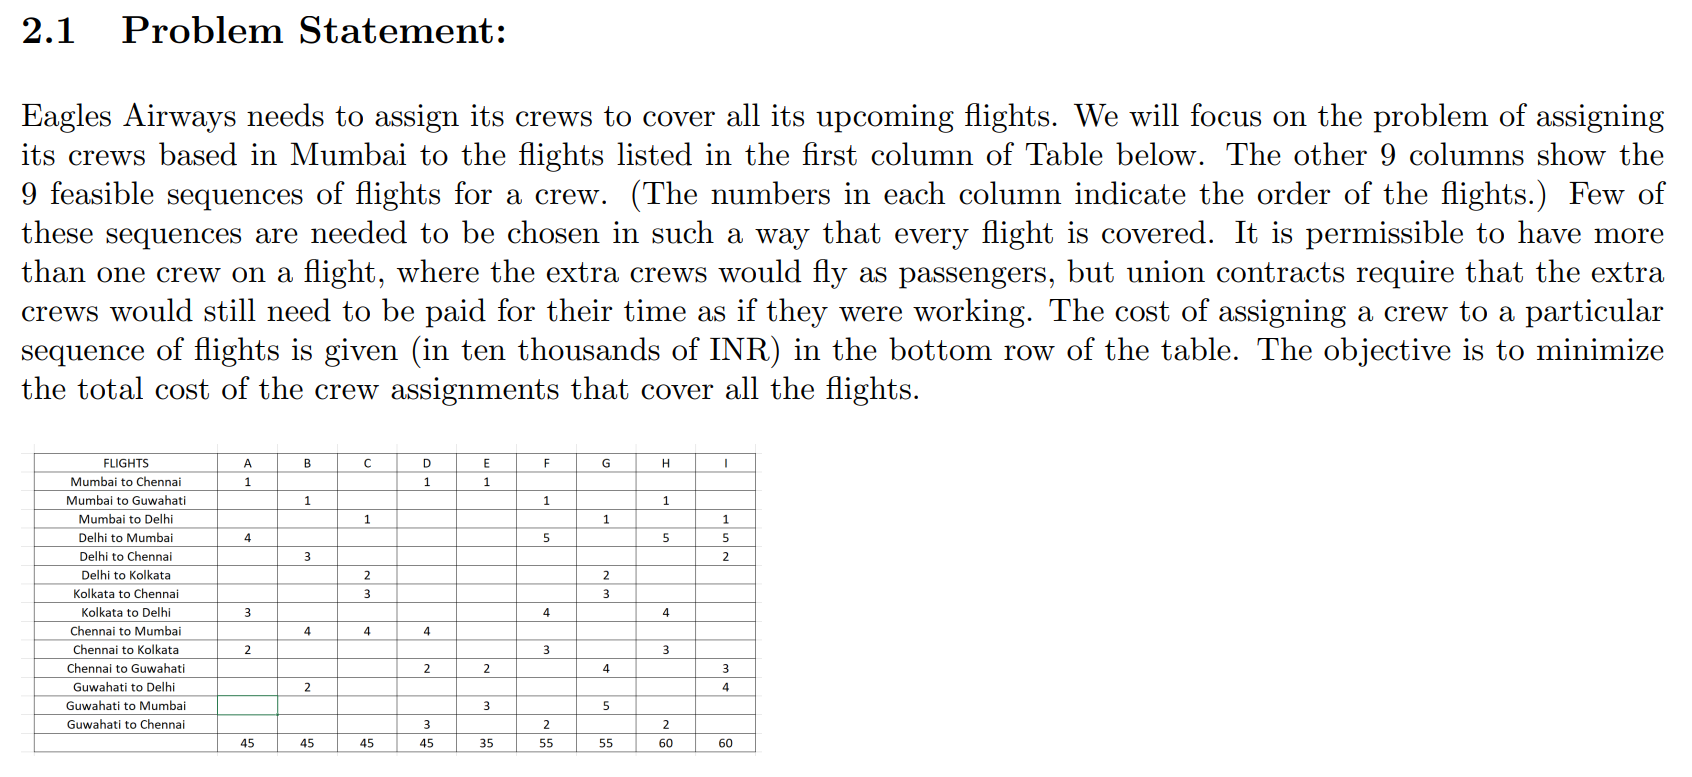

**1. Formulate this problem as an integer programming problem and solve it using a solver. Report the solution (the
number of crews and assigned tours) and the cost.**

 To formulate the Crew Assignment optimization problem for Eagles Airways, we can define decision variables, constraints, and the objective function as follows:

- **Decision Variables**:
Let $ x_{i} $ be a binary variable representing whether crew $ i $ is assigned.
$ x_{i} = 1 $ if crew $ i $ is assigned and $ x_{i} = 0 $ otherwise.

- **Objective Function**:
Minimize the total cost of crew assignments

- **Constraints**:
1. Each tour must be covered by at least one crew:

2. All flights must be covered:



**Objective**:

$Min.$
45$x_A$ + 45$x_B$ + 45$x_C$ + 45$x_D$ + 35$x_E$ + 55$x_F$ + 55$x_G$ + 60$x_H$ + 60$x_I$

S.t.

$$x_B + x_F + x_H \geq 1$$

$$x_A + x_D + x_F \geq 1$$

$$x_C + x_G + x_I \geq 1$$

$$x_A + x_F + x_H + x_I \geq 1$$

$$x_B + x_I \geq 1$$

$$x_C + x_G \geq 1$$



$$x_A + x_F + x_H \geq 1$$

$$x_B + x_C + x_D \geq 1$$

$$x_A + x_F + x_H \geq 1$$

$$x_D + x_E + x_G + x_I\geq 1$$

$$x_B + x_I \geq 1$$

$$x_E + x_G \geq 1$$

$$x_D + x_F + x_H \geq 1$$

$$x_i \in \{0,1\},$$

 where,  $$i \in {A,B,C,D,E,F,G,H,I}$$

In [60]:
import numpy as np
import time

A ={0, 3, 7, 9}
B ={1, 4, 8, 11}
C ={3, 6, 7, 9}
D={0, 8, 10, 13}
E={0, 10, 12}
F={1, 3, 7, 9, 13}
G={2, 5, 6, 10, 12}
H={1, 3, 7, 9, 13}
I={2, 3, 4, 10, 11}

subsets = [A,B,C,D,E,F,G,H,I]

costs = [45, 45, 45, 45, 35, 55, 55, 60, 60]

A =[
    [1, 0, 0,1, 1, 0, 0,0, 0],
    [0, 1, 0,0,0, 1, 0, 1, 0],
    [0, 0, 1,0,0,0, 1,  0, 1],
    [1, 0, 0, 0,0, 1,0, 1, 1],
    [ 0, 1, 0,0,0,0, 0, 0, 1],
    [0, 0, 1, 0,0,0, 1, 0,0],
    [0,0, 1, 0, 0,0, 1, 0, 0],
    [1,0, 0, 0,0, 1, 0, 1,0],
    [0,1, 1, 1,0, 0, 0, 0, 0],
    [1,0,0,0, 0, 1, 0, 1, 0],
    [0, 0,0,1,1, 0, 1, 0, 1],
    [0,1, 0, 0, 0, 0,0, 0, 1],
    [0,0,0,0, 1,0, 1, 0,0],
    [0,0,0,1, 0,1, 0, 1, 0]
]

In [10]:
constraints = [
    [1, 5, 7],
    [0, 3, 5],
    [2, 6, 8],
    [0, 5, 7, 8],
    [1, 8],
    [2, 6],
    [0, 5, 7],
    [1, 2, 3],
    [0, 5, 7],
    [3, 4, 6, 8],
    [1, 8],
    [4, 6],
    [3, 5, 7]
]

In [38]:
model = ConcreteModel()
model.y = Var(range(9), domain = Binary)
cost=[45,45,45,45,35,55,55,60,60]
model.objective = Objective(expr = sum(cost[i]*model.y[i] for i in range(9)), sense = minimize)

model.constraints = ConstraintList()

for i in range(14):
  model.constraints.add(expr = sum(A[i][j]*model.y[j] for j in range(9)) >= 1)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

In [39]:
model.pprint()

1 Var Declarations
    y : Size=9, Index={0, 1, 2, 3, 4, 5, 6, 7, 8}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
          8 :     0 :   0.0 :     1 : False : False : Binary

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 45*y[0] + 45*y[1] + 45*y[2] + 45*y[3] + 35*y[4] + 55*y[5] + 55*y[6] + 60*y[7] + 60*y[8]

1 Constraint Declarations
    constraints : Size=14, Index={1, 2, 3, 4, 5, 6,

In [40]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 180.0
  Upper bound: 180.0
  Number of objectives: 1
  Number of constraints: 14
  Number of variables: 9
  Number of nonzeros: 39
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 3
      Number of created subproblems: 3
  Error rc: 0
  Time: 0.008864641189575195
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

In [41]:
# display solution
print('Objective Value: ',model.objective())
print('\nDecision Variables')
for i in range(9):
  print(f'y{i} = { model.y[i]()}')

print('\nConstraints')
for i in range(1,15):
  print(f'Constraint {i} =  {model.constraints[i]()}')

Objective Value:  180.0

Decision Variables
y0 = 0.0
y1 = 1.0
y2 = 1.0
y3 = 0.0
y4 = 1.0
y5 = 1.0
y6 = 0.0
y7 = 0.0
y8 = 0.0

Constraints
Constraint 1 =  1.0
Constraint 2 =  2.0
Constraint 3 =  1.0
Constraint 4 =  1.0
Constraint 5 =  1.0
Constraint 6 =  1.0
Constraint 7 =  1.0
Constraint 8 =  1.0
Constraint 9 =  2.0
Constraint 10 =  1.0
Constraint 11 =  1.0
Constraint 12 =  1.0
Constraint 13 =  1.0
Constraint 14 =  1.0


**Used Crew = B,C,E and F**

**2. Formulate it as a weighted set cover problem and solve it using a greedy algorithm.**

In [58]:
def greedy_weighted_set_cover(subsets,costs, universal_set):
    I =set()
    subsets_used=[]
    while I != set(universal_set):
        cost_cover_ratio=[]
        for i in range(len(subsets)):
            remaining_elements = subsets[i]-I
            if len(remaining_elements)>0:
                ratio = costs[i] / len(remaining_elements)
                cost_cover_ratio.append((ratio,i))
        if not cost_cover_ratio:
            break
        min_ratio, min_ratio_index=min(cost_cover_ratio)
        I =I.union(subsets[min_ratio_index])
        subsets_used.append(min_ratio_index)
    return subsets_used


In [61]:
start_time = time.time()
selected_subsets = greedy_weighted_set_cover(subsets, costs, range(14))
end_time = time.time()
time_taken1 = end_time-start_time

print("Selected crews :",selected_subsets)
print("Time taken : ",end_time-start_time)

Selected crews : [5, 6, 1, 4]
Time taken :  0.00021028518676757812


In [62]:
total_cost = 0
for i in selected_subsets:
  total_cost = total_cost + costs[i]
print("The total total cost in 10k INR is:" ,total_cost)

The total total cost in 10k INR is: 190


**Therefore the selected crews are B , E , F and G**

**3. Suppose the flights from Chennai to Guwahati are cancelled and hence associated tours are no longer feasible.
Find the new solution using:
(a) IP formulation.
(b) Greedy Algorithm.**

In [42]:
A = [
    [1, 0, 0,1, 1, 0, 0,0, 0],
    [0, 1, 0,0,0, 1, 0, 1, 0],
    [0, 0, 1,0,0,0, 1,  0, 1],
    [1, 0, 0, 0,0, 1,0, 1, 1],
    [ 0, 1, 0,0,0,0, 0, 0, 1],
    [0, 0, 1, 0,0,0, 1, 0,0],
    [0,0, 1, 0, 0,0, 1, 0, 0],
    [1,0, 0, 0,0, 1, 0, 1,0],
    [0,1, 1, 1,0, 0, 0, 0, 0],
    [1,0,0,0, 0, 1, 0, 1, 0],
   #chennai to guwahati flight is cancel
    [0,1, 0, 0, 0, 0,0, 0, 1],
    [0,0,0,0, 1,0, 1, 0,0],
    [0,0,0,1, 0,1, 0, 1, 0]
]

In [43]:
model1 = ConcreteModel()
model1.y = Var(range(9), domain = Binary)
cost=[45,45,45,45,35,55,55,60,60]
model1.objective = Objective(expr = sum(cost[i]*model1.y[i] for i in range(9)), sense = minimize)

model1.constraints = ConstraintList()

for i in range(13):
  model1.constraints.add(expr = sum(A[i][j]*model1.y[j] for j in range(9)) >= 1)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model1)
model1.pprint()
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

1 Var Declarations
    y : Size=9, Index={0, 1, 2, 3, 4, 5, 6, 7, 8}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
          8 :     0 :   0.0 :     1 : False : False : Binary

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 45*y[0] + 45*y[1] + 45*y[2] + 45*y[3] + 35*y[4] + 55*y[5] + 55*y[6] + 60*y[7] + 60*y[8]

1 Constraint Declarations
    constraints : Size=13, Index={1, 2, 3, 4, 5, 6,

In [44]:
# display solution
print('Objective Value: ',model1.objective())
print('\nDecision Variables')
for i in range(9):
  print(f'y{i} = { model1.y[i]()}')

print('\nConstraints')
for i in range(1,14):
  print(f'Constraint {i} =  {model1.constraints[i]()}')

Objective Value:  180.0

Decision Variables
y0 = 0.0
y1 = 1.0
y2 = 1.0
y3 = 0.0
y4 = 1.0
y5 = 1.0
y6 = 0.0
y7 = 0.0
y8 = 0.0

Constraints
Constraint 1 =  1.0
Constraint 2 =  2.0
Constraint 3 =  1.0
Constraint 4 =  1.0
Constraint 5 =  1.0
Constraint 6 =  1.0
Constraint 7 =  1.0
Constraint 8 =  1.0
Constraint 9 =  2.0
Constraint 10 =  1.0
Constraint 11 =  1.0
Constraint 12 =  1.0
Constraint 13 =  1.0



*Therefore the selected crews are B , C , E and F*

##**Greedy algorithm**

In [63]:
A={0,3,7,9}
B={1,4,8,10}
C={2,5,6,8}
D={0,8,12}
E={0,11}
F={1,3,7,9,12}
G={2,5,6,11}
H={1,3,7,9,12}
I={2,3,4,10}
subsets1 = [A,B,C,D,E,F,G,H,I]

In [64]:
costs = [45, 45, 45, 45, 35, 55, 55, 60, 60]

In [65]:
start_time = time.time()
selected_subsets1 = greedy_weighted_set_cover(subsets1, costs, range(14))
end_time = time.time()
time_taken2 = end_time-start_time
print("Selected crews :",selected_subsets1)
print("Time taken : ",end_time-start_time)

Selected crews : [5, 2, 4, 1]
Time taken :  0.0001895427703857422


*Therefore the selected crews are B , C , E and F*

In [66]:
total_cost = 0
for i in selected_subsets1:
  total_cost = total_cost + costs[i]
print("The total total cost in 10k INR is:" ,total_cost)

The total total cost in 10k INR is: 180


**4. Compare the solutions of 2.1, 2.2 and 2.3 given by the integer program and greedy algorithm in the following
counts:
(a) Running time.
(b) Ratio of objective value of IP solution to Greedy solution**

In [52]:
time_taken_ilp1 =  0.008864641189575195
time_taken_ilp2 =  0.007370948791503906

In [54]:
print('Time Taken by ILP in Intial problem:',time_taken_ilp1)
print('Time Taken by greedy algorithm in Intial problem:',time_taken1)
print('______________________________________________________________________')
print()
print('Time Taken by ILP in  problem after removing flight:',time_taken_ilp2)
print('Time Taken by greedy algorithm in problem after removing flight:',time_taken2)

Time Taken by ILP in Intial problem: 0.008864641189575195
Time Taken by greedy algorithm in Intial problem: 0.00020956993103027344
______________________________________________________________________

Time Taken by ILP in  problem after removing flight: 0.007370948791503906
Time Taken by greedy algorithm in problem after removing flight: 0.00019693374633789062


In [67]:
print("Objective ratio of ILP to greedy  in Intial problem:\n", 180/190)
print('______________________________________________________________________\n')
print("Objective ratio of ILP to greedy  in problem after removing one flight:\n", 180/180)

Objective ratio of ILP to greedy  in Intial problem:
 0.9473684210526315
______________________________________________________________________

Objective ratio of ILP to greedy  in problem after removing one flight:
 1.0
